In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [ ]:
x = data[:,:3]
y = data[:,3]

In [ ]:
new_column = np.ones(25)
x = np.insert(x, 0, new_column, axis=1)
x

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [ ]:
print(x.shape,y.shape)

(25, 4) (25,)


Batch g for MBGD

In [ ]:
def batch_mbgd(x , y , LR , gamma, iters):
  m = len(y)
  loss = []
  thetas = []
  theta = np.zeros((x.shape[1]))
  hypos = []
  prev_cost = float('inf')
  v_theta = np.zeros((x.shape[1]))
  for i in range(iters):
    print("**********iteration",i,"**********\n")
    thetas.append(theta) #same size this way
    h = np.dot(x, theta)
    hypos.append(h)
    print("h ", h,"\n")
    error_vec = h-y
    print("errorvec " ,error_vec,"\n")
    j = np.mean(error_vec**2) / 2
    loss.append(j)
    print("j ",j,"\n")
    gradvec = np.dot(x.T, error_vec) / m
    print("grad vector ", gradvec,"\n")
    gradvecNorm = np.linalg.norm(gradvec)
    print("grad vector norm ", gradvecNorm,"\n")

    if gradvecNorm < 0.01 or abs(prev_cost - j) < 0.001:
      break
    else:
      prev_cost = j
      v_theta = gamma*v_theta + LR*gradvec
      theta = theta - v_theta

  return thetas, loss, theta , h , hypos

In [ ]:
thetas, loss , theta , h ,hs = batch_mbgd(x,y,0.0001,0.9999,300)

Streaming output truncated to the last 5000 lines.
**********iteration 50 **********

h  [361.10383127 436.58030309 428.67666998 468.94437047 331.88129177
 248.19412692 353.39739526 265.23390558 411.15472135 385.66183583
 339.1055578  336.29583459 440.79212703 363.61673056 355.63555768
 444.77523837 344.56278787 424.8344955  419.50554369 375.45745074
 414.04279187 411.44050175 393.94535439 359.21323126 451.07957365] 

errorvec  [209.10383127 251.58030309 248.67666998 272.94437047 189.88129177
 147.19412692 204.39739526 150.23390558 236.15472135 221.66183583
 198.1055578  195.29583459 256.79212703 211.61673056 207.63555768
 252.77523837 197.56278787 241.8344955  242.50554369 216.45745074
 237.04279187 236.44050175 218.94535439 210.21323126 259.07957365] 

j  24799.32663365084 

grad vector  [  220.56524913 17791.27265284 17885.89632205 18312.78589456] 

grad vector norm  31174.37162317657 

**********iteration 51 **********

h  [204.65290188 248.55818174 243.40293224 267.21005702 188.45

R2 =  -1180.9909881510462


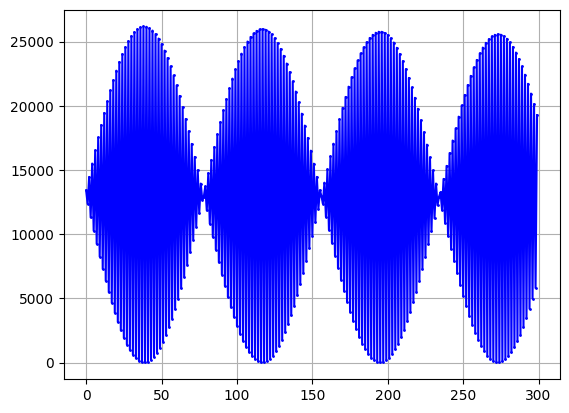

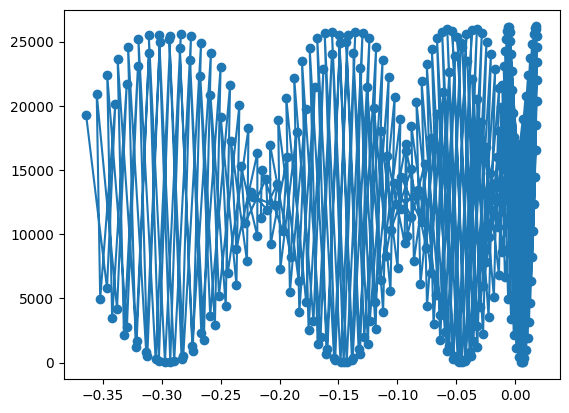

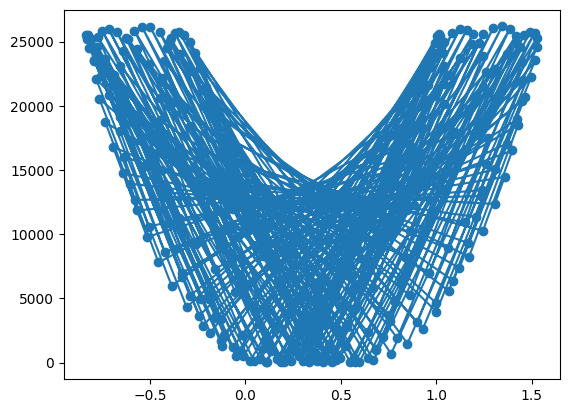

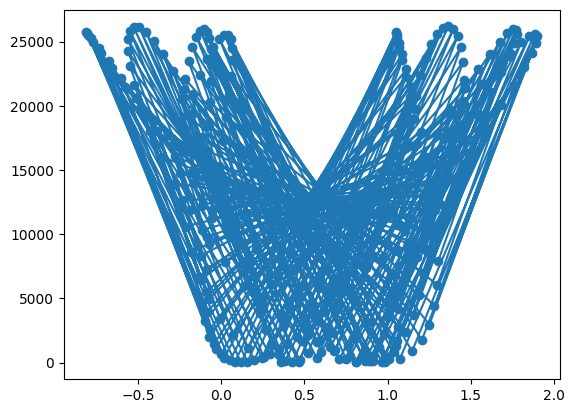

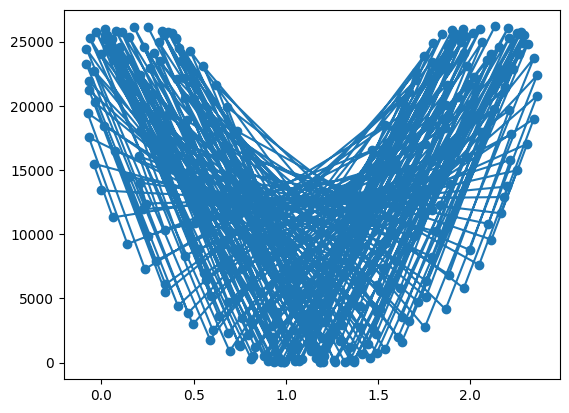

In [ ]:
from sklearn.metrics import r2_score
print(f"R2 = ",r2_score(h,y))

i = list(range(len(loss)))
plt.plot(i, loss, color='blue', marker='o', markersize = 1)
plt.grid(True)
plt.show()

for value in range(len(thetas[0])):
  theta = [arr[value] for arr in thetas]
  plt.plot(theta, loss, marker='o', linestyle='-')
  plt.show()

In [ ]:
#above -> high gamma-> high oscillation and divergence

In [ ]:
thetas, loss , theta , h ,hs = batch_mbgd(x,y,0.0001,0.005,500)

Streaming output truncated to the last 5000 lines.
 174.91888918 174.03627766 166.56096916 153.38252397 191.39331731] 

errorvec  [ 1.33130574  0.02163468  1.8852744   2.6070824  -1.13858016  3.7391486
  0.23252261 -3.59529185 -1.27897758 -1.87694112  2.46151054  0.97822846
  3.39224946  3.08209921  2.08529423 -3.81813312  0.29028868 -3.74688379
  1.456284    0.69105242 -2.08111082 -0.96372234 -8.43903084  4.38252397
 -0.60668269] 

j  4.105260730237327 

grad vector  [ 0.0436458   2.89061196  2.30688978 -5.00603868] 

grad vector norm  6.224122922888504 

**********iteration 260 **********

h  [153.32928454 185.02100552 181.88360229 198.60678546 140.86012855
 104.74075667 149.23406067 111.40825661 173.72271329 162.1281539
 143.46196335 141.98005307 187.38899119 155.07732874 150.08727676
 188.18251533 147.28445214 179.25550934 178.45265798 159.68788953
 174.9204097  174.03706038 166.56183144 153.3769232  191.3916638 ] 

errorvec  [ 1.32928454  0.02100552  1.88360229  2.60678546 -1.1398

R2 =  0.9867208526980298


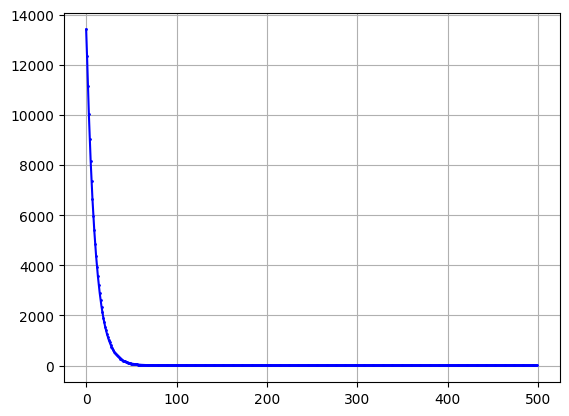

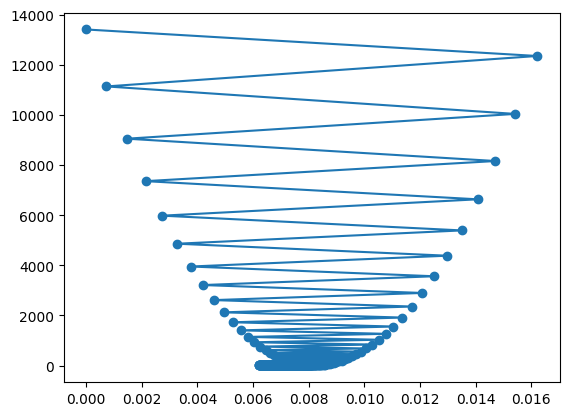

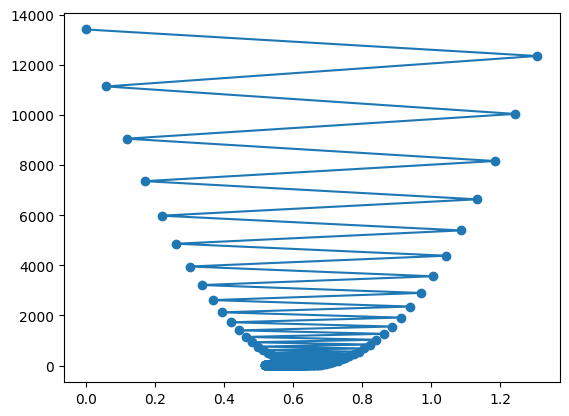

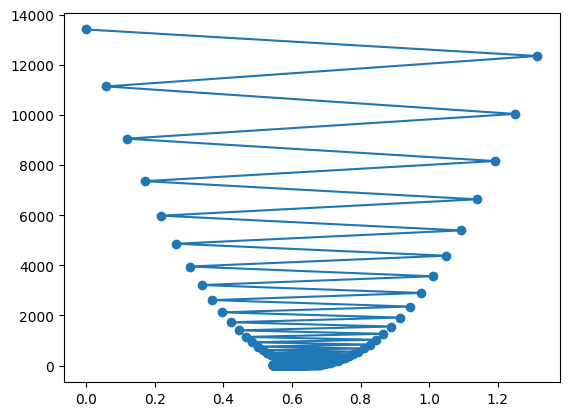

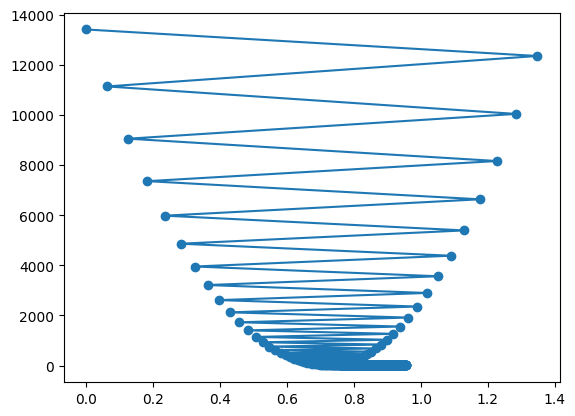

In [ ]:
from sklearn.metrics import r2_score
print(f"R2 = ",r2_score(h,y))

i = list(range(len(loss)))
plt.plot(i, loss, color='blue', marker='o', markersize = 1)
plt.grid(True)
plt.show()

for value in range(len(thetas[0])):
  theta = [arr[value] for arr in thetas]
  plt.plot(theta, loss, marker='o', linestyle='-')
  plt.show()

In [ ]:
thetas, loss , theta , h ,hs = batch_mbgd(x,y,0.0001,0.1,300)

Streaming output truncated to the last 5000 lines.
grad vector norm  9.371770052200283 

**********iteration 51 **********

h  [153.75898172 185.01677696 182.17919285 198.5444118  141.04482371
 104.22345824 148.76214896 110.47924837 173.12859177 160.68199977
 143.24684551 141.39093366 188.07915392 156.16635817 149.49291653
 187.85991484 148.62694744 178.56673973 179.25195725 160.38971036
 174.42887369 173.69116391 166.24695844 154.70621148 191.65028248] 

errorvec  [ 1.75898172  0.01677696  2.17919285  2.5444118  -0.95517629  3.22345824
 -0.23785104 -4.52075163 -1.87140823 -3.31800023  2.24684551  0.39093366
  4.07915392  4.16635817  1.49291653 -4.14008516  1.62694744 -4.43326027
  2.25195725  1.38971036 -2.57112631 -1.30883609 -8.75304156  5.70621148
 -0.34971752] 

j  5.3223919237289055 

grad vector  [ 0.02458406  3.76784591  3.9984805  -7.56632181] 

grad vector norm  9.350633088781645 

**********iteration 52 **********

h  [153.75593286 185.01693592 182.17717058 198.54475728 141.

R2 =  0.9853937599385547


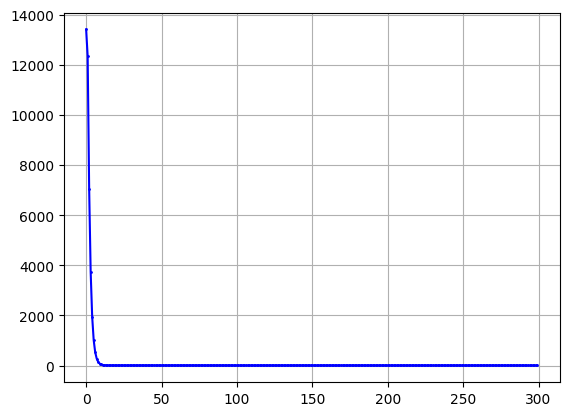

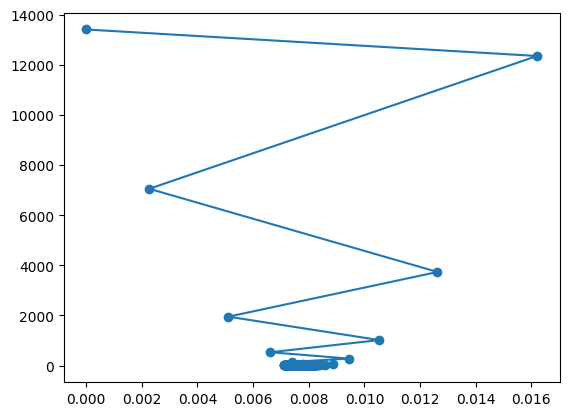

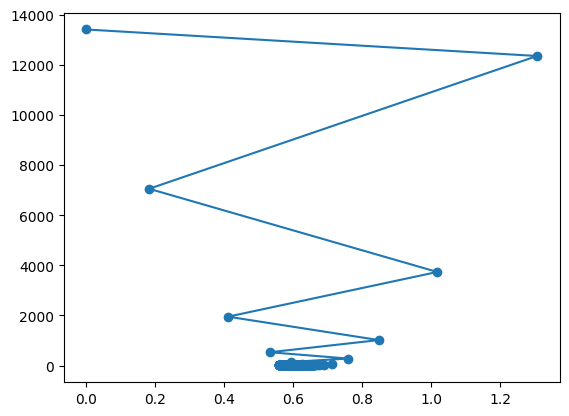

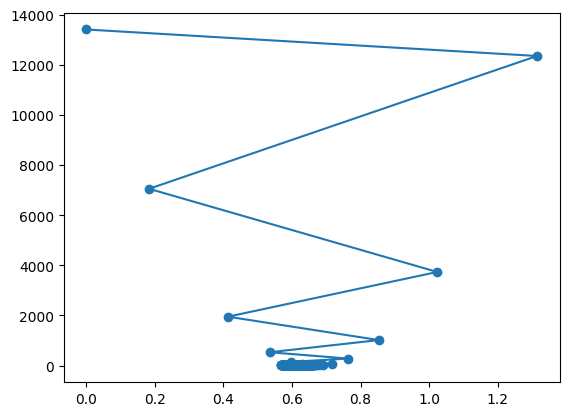

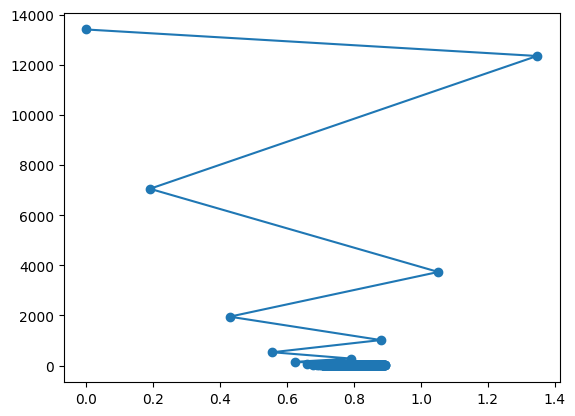

In [ ]:
from sklearn.metrics import r2_score
print(f"R2 = ",r2_score(h,y))

i = list(range(len(loss)))
plt.plot(i, loss, color='blue', marker='o', markersize = 1)
plt.grid(True)
plt.show()

for value in range(len(thetas[0])):
  theta = [arr[value] for arr in thetas]
  plt.plot(theta, loss, marker='o', linestyle='-')
  plt.show()

NAG for batch GD

In [ ]:
def batch_nag(x, y, LR, gamma, iters):
    m = len(y)
    loss = []
    thetas = []
    theta = np.zeros((x.shape[1]))
    hypos = []
    prev_cost = float('inf')
    v_theta = np.zeros((x.shape[1]))

    for i in range(iters):
        print("**********iteration", i, "**********\n")
        thetas.append(theta.copy())
        h = np.dot(x, theta)
        hypos.append(h)
        print("h ", h, "\n")
        error_vec = h - y
        print("errorvec ", error_vec, "\n")
        j = np.mean(error_vec ** 2) / 2
        loss.append(j)
        print("j ", j, "\n")
        gradvec = np.dot(x.T, error_vec) / m
        print("grad vector ", gradvec, "\n")
        gradvecNorm = np.linalg.norm(gradvec)
        print("grad vector norm ", gradvecNorm, "\n")

        if gradvecNorm < 0.01 or abs(prev_cost - j) < 0.001:
            break
        else:
            prev_cost = j
            theta_temp = theta - gamma * v_theta
            h_temp = np.dot(x, theta_temp)
            error_vectemp = h_temp - y
            gradvectemp = np.dot(x.T, error_vectemp) / m
            theta = theta_temp - LR * gradvectemp
            v_theta = gamma * v_theta + LR * gradvectemp

    return thetas, loss, theta, h, hypos


In [ ]:
thetas, loss , theta , h ,hs = batch_nag(x,y,0.0001,0.005,500)

Streaming output truncated to the last 5000 lines.
h  [153.28098728 184.96653034 181.82783744 198.54908833 140.8169637
 104.7140297  149.19438085 111.38364067 173.67633777 162.09222508
 143.42168143 141.94307371 187.32832994 155.02279478 150.04828394
 188.1297995  147.22993688 179.20898213 178.3937929  159.63538287
 174.8733135  173.98869008 166.51576009 153.32113268 191.33321405] 

errorvec  [ 1.28098728 -0.03346966  1.82783744  2.54908833 -1.1830363   3.7140297
  0.19438085 -3.61635933 -1.32366223 -1.90777492  2.42168143  0.94307371
  3.32832994  3.02279478  2.04828394 -3.8702005   0.22993688 -3.79101787
  1.3937929   0.63538287 -2.1266865  -1.01130992 -8.48423991  4.32113268
 -0.66678595] 

j  4.094812835587869 

grad vector  [-4.15241480e-03 -9.96839714e-01 -1.60983108e+00 -8.96422053e+00] 

grad vector norm  9.162014648249501 

**********iteration 263 **********

h  [153.36880955 185.07386641 181.93255545 198.66464896 140.89801662
 104.77633027 149.28263363 111.4514625  173.778914

R2 =  0.9867208315684151


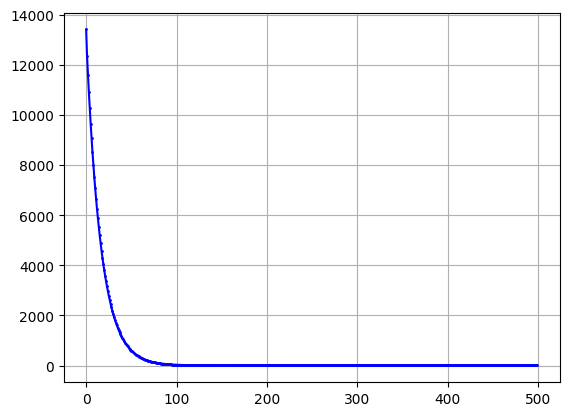

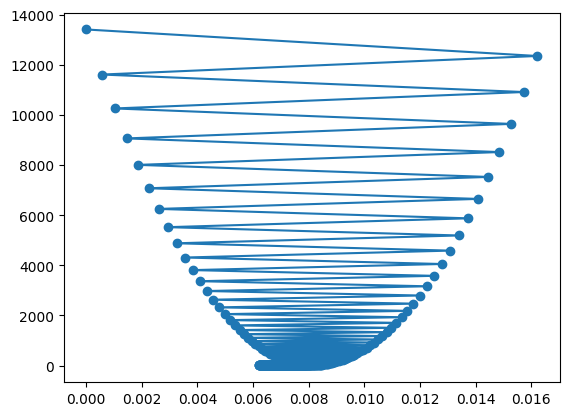

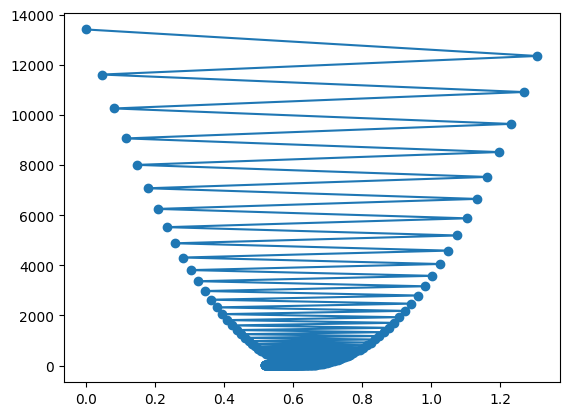

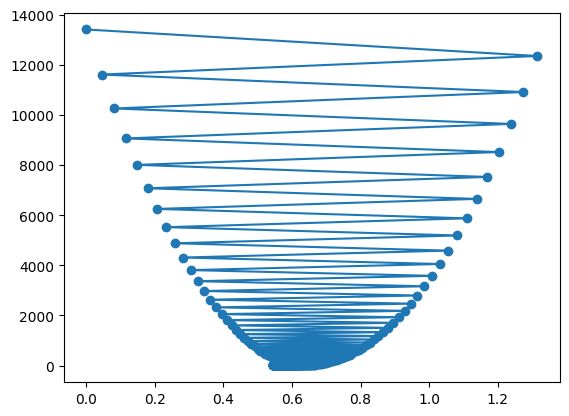

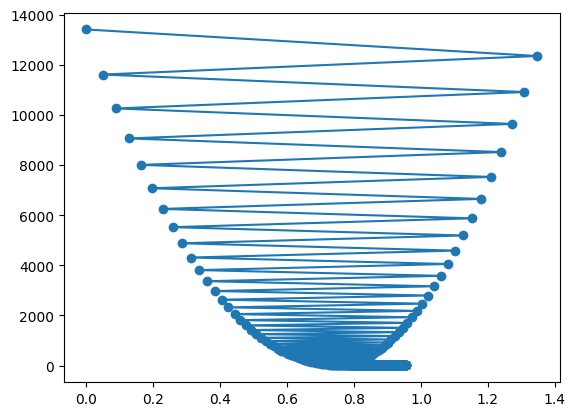

In [ ]:
print(f"R2 = ",r2_score(h,y))

i = list(range(len(loss)))
plt.plot(i, loss, color='blue', marker='o', markersize = 1)
plt.grid(True)
plt.show()

for value in range(len(thetas[0])):
  theta = [arr[value] for arr in thetas]
  plt.plot(theta, loss, marker='o', linestyle='-')
  plt.show()